In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_excel('wage.xlsx', 'wage')

In [4]:
df.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2,0,0,7,29,NaN,NaN,158413,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,6.306275,256
1,3,0,0,12,27,8.0,8.0,380166,1,0,...,1,481,0,35.0,93.0,1.0,1.0,9,6.175867,81
2,4,0,0,12,34,14.0,12.0,367470,1,0,...,1,721,0,42.0,103.0,1.0,1.0,16,6.580639,256
3,5,1,1,11,27,11.0,12.0,380166,1,0,...,1,250,0,25.0,88.0,1.0,1.0,10,5.521461,100
4,6,1,1,12,34,8.0,7.0,367470,1,0,...,1,729,0,34.0,108.0,1.0,0.0,16,6.591674,256


In [22]:
df.describe()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,2320.000000,2657.000000,3.010000e+03,3010.000000,3010.000000,...,3010.000000,3010.000000,3010.000000,2963.000000,2061.000000,3003.000000,2997.000000,3010.000000,3010.000000,3010.000000
mean,2581.748837,0.440864,0.682060,13.263455,28.119601,10.003448,10.348137,3.211853e+05,0.789369,0.100664,...,0.649502,577.282392,0.092359,33.540668,102.449782,2.271395,0.674341,8.856146,6.261832,95.579070
std,1500.538849,0.496573,0.465753,2.676913,3.137004,3.720737,3.179671,1.706458e+05,0.407825,0.300934,...,0.477205,262.958302,0.289580,8.611619,15.423756,2.066823,0.468699,4.141672,0.443798,84.618314
min,2.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,7.560700e+04,0.000000,0.000000,...,0.000000,100.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,4.605170,0.000000
25%,1275.500000,0.000000,0.000000,12.000000,25.000000,8.000000,8.000000,1.227980e+05,1.000000,0.000000,...,0.000000,394.250000,0.000000,28.000000,93.000000,1.000000,0.000000,6.000000,5.976985,36.000000
50%,2541.000000,0.000000,1.000000,13.000000,28.000000,10.000000,12.000000,3.652000e+05,1.000000,0.000000,...,1.000000,537.500000,0.000000,34.000000,103.000000,1.000000,1.000000,8.000000,6.286928,64.000000
75%,3858.750000,1.000000,1.000000,16.000000,31.000000,12.000000,12.000000,4.060240e+05,1.000000,0.000000,...,1.000000,708.750000,0.000000,40.000000,113.000000,4.000000,1.000000,11.000000,6.563503,121.000000
max,5225.000000,1.000000,1.000000,18.000000,34.000000,18.000000,18.000000,1.752340e+06,1.000000,1.000000,...,1.000000,2404.000000,1.000000,56.000000,149.000000,6.000000,1.000000,23.000000,7.784889,529.000000


In [11]:
nearc2_counts = df['nearc2'].value_counts()

In [19]:
df.columns

Index(['id', 'nearc2', 'nearc4', 'educ', 'age', 'fatheduc', 'motheduc',
       'weight', 'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662',
       'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669',
       'south66', 'black', 'smsa', 'south', 'smsa66', 'wage', 'enroll', 'KWW',
       'IQ', 'married', 'libcrd14', 'exper', 'lwage', 'expersq'],
      dtype='object')

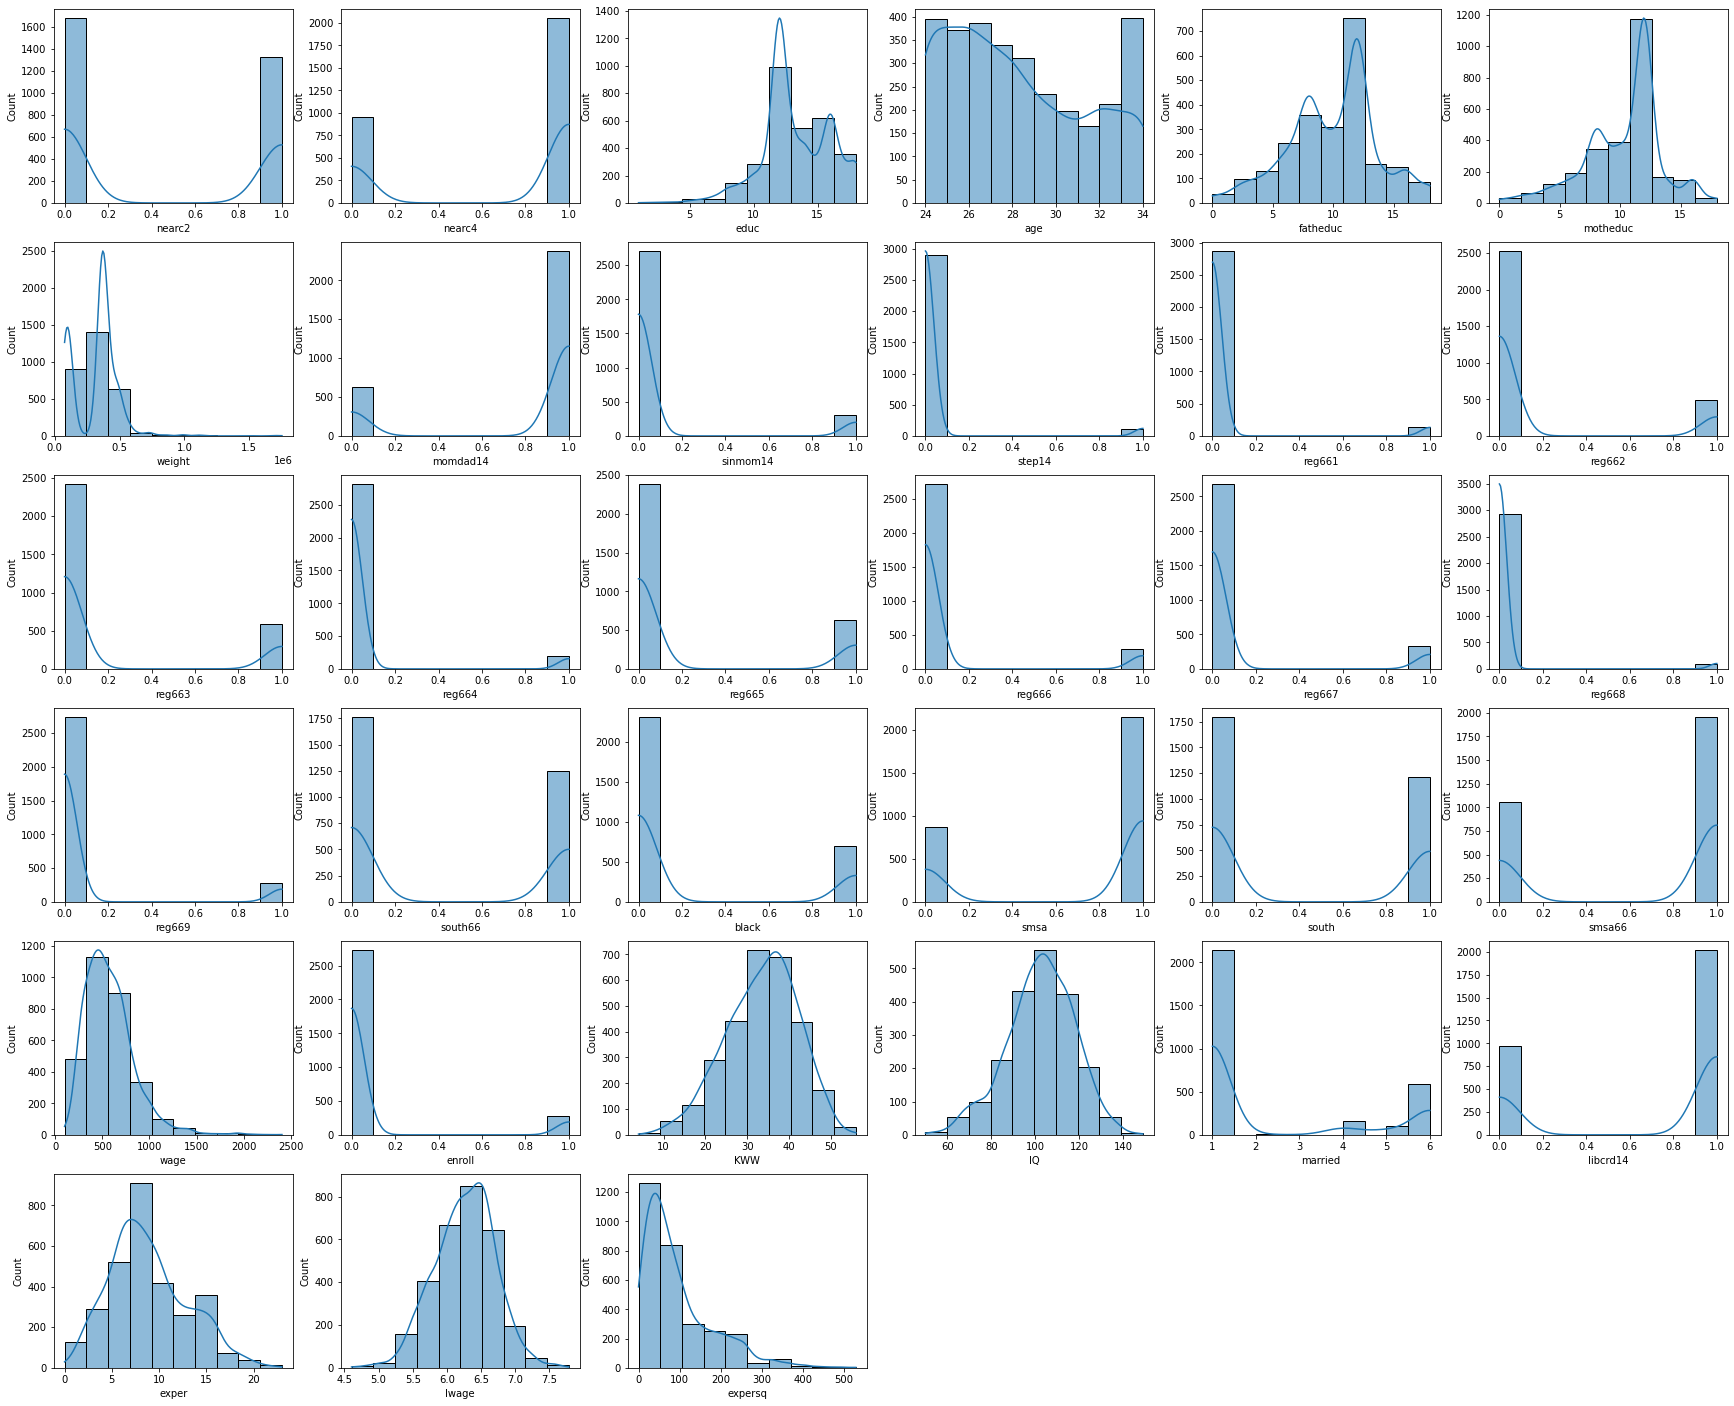

In [37]:
plt.figure(figsize=(30,25))
for i in range(1, len(df.columns)):
    plt.subplot(6, 6, i)
    sns.histplot(data=df, x=df.columns[i], kde=True, bins=10)

plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

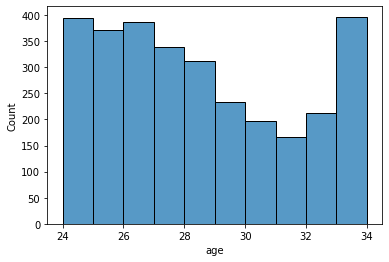

In [28]:
sns.histplot(data=df, x='age', bins=10)

<AxesSubplot:xlabel='fatheduc', ylabel='Count'>

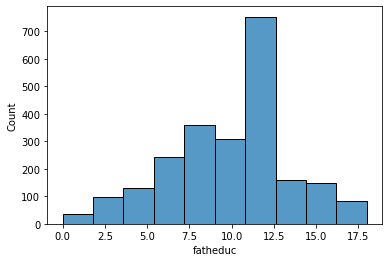

In [30]:
sns.histplot(data=df, x='fatheduc', bins=10)

Một vài dự đoán:
- reg661 -> reg669: chỉ có một giá trị 1 ở một cột, thuộc kiểu one-hot endode, nên gộp lại thành 1 cột
- Xem xét sự ảnh hưởng của các feature như black, IQ, married, KWW,... đến wage